## loading dataset

In [1]:
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D , MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
from PIL import Image
from sklearn.metrics import confusion_matrix
import itertools
warnings.filterwarnings('ignore')
import keras
from sklearn.model_selection import StratifiedKFold

In [2]:
DATADIR = "./Fruits_Vegetables/sample_train/"

In [3]:
CATEGORIES = ['apple','banana','beetroot' ,'bell pepper','cabbage','capsicum','carrot','cauliflower','chilli pepper','corn']


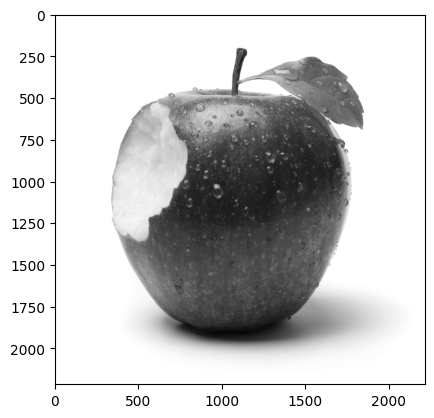

In [4]:
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break

In [5]:
print(img_array.shape)

(2216, 2218)


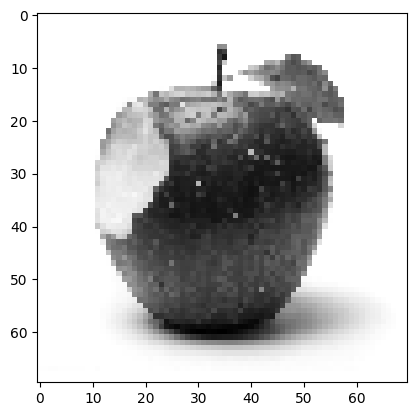

In [6]:
IMG_SIZE = 70

new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap='gray')

In [7]:
features=[]
labels=[]

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_name = os.path.basename(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                features.append([new_array])
                labels.append([class_name])
            except Exception as e:
                pass
                
                
                
create_training_data()

In [8]:
test_data_directory = "./Fruits_Vegetables/sample_test/"

In [9]:
test_features=[]
test_labels=[]

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(test_data_directory,category)
        class_name = os.path.basename(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                test_features.append([new_array])
                test_labels.append([class_name])
            except Exception as e:
                pass
                
                
                
create_training_data()

## preprocessing

In [10]:
X_train = np.array(features).reshape(-1,IMG_SIZE,IMG_SIZE,1)
X_test  = np.array(test_features).reshape(-1,IMG_SIZE,IMG_SIZE,1)


In [11]:
X_train.shape

(836, 70, 70, 1)

In [12]:
X_test.shape

(99, 70, 70, 1)

In [13]:
label_encoder = LabelEncoder()

In [14]:
y_train = label_encoder.fit_transform(labels)
y_test = label_encoder.fit_transform(test_labels)

In [15]:
y_train[777]

9

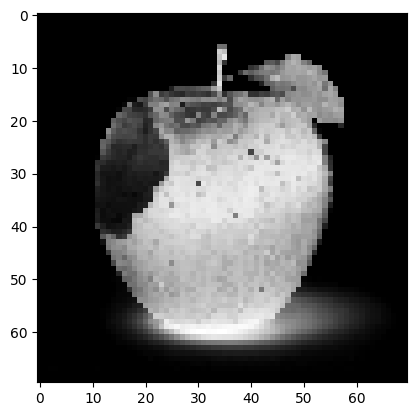

In [16]:
plt.imshow(X_train[0],cmap=plt.cm.binary)

 ## scaling

In [17]:
X_train =tf.keras.utils.normalize(X_train, axis=1)
X_test =tf.keras.utils.normalize(X_test, axis=1)


## normalized picture

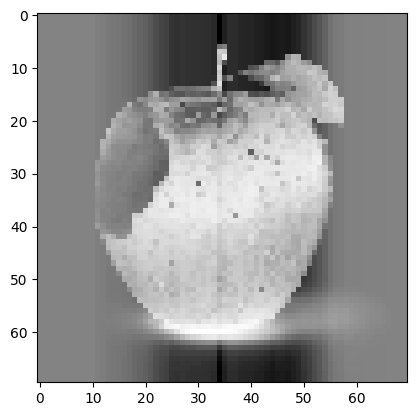

In [18]:
plt.imshow(X_train[0],cmap=plt.cm.binary)

In [19]:
X_train[0]

array([[[0.11952954],
        [0.11952954],
        [0.1195362 ],
        ...,
        [0.11958287],
        [0.11952286],
        [0.11952286]],

       [[0.11952954],
        [0.11952954],
        [0.1195362 ],
        ...,
        [0.11958287],
        [0.11952286],
        [0.11952286]],

       [[0.11952954],
        [0.11952954],
        [0.1195362 ],
        ...,
        [0.11958287],
        [0.11952286],
        [0.11952286]],

       ...,

       [[0.1190608 ],
        [0.1190608 ],
        [0.11859866],
        ...,
        [0.11958287],
        [0.11952286],
        [0.11952286]],

       [[0.11952954],
        [0.11952954],
        [0.1195362 ],
        ...,
        [0.11958287],
        [0.11952286],
        [0.11952286]],

       [[0.11952954],
        [0.11952954],
        [0.1195362 ],
        ...,
        [0.11958287],
        [0.11952286],
        [0.11952286]]])

## build the model

## Ann

In [20]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1000,activation=tf.nn.relu)) ## 128 neurons in the layer
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(500,activation=tf.nn.relu))


model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))


model.compile(optimizer='SGD',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


In [21]:
# from tensorflow.keras.callbacks import EarlyStopping

In [22]:
# early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [23]:
r = model.fit(X_train,y_train,epochs=25)

Epoch 1/25
27/27 [==============================] - 2s 32ms/step - loss: 2.4578 - accuracy: 0.1627
Epoch 2/25
27/27 [==============================] - 1s 31ms/step - loss: 1.9977 - accuracy: 0.3014
Epoch 3/25
27/27 [==============================] - 1s 27ms/step - loss: 1.7221 - accuracy: 0.4294
Epoch 4/25
27/27 [==============================] - 1s 27ms/step - loss: 1.5369 - accuracy: 0.4952
Epoch 5/25
27/27 [==============================] - 1s 27ms/step - loss: 1.3562 - accuracy: 0.5706
Epoch 6/25
27/27 [==============================] - 1s 26ms/step - loss: 1.1883 - accuracy: 0.6316
Epoch 7/25
27/27 [==============================] - 1s 27ms/step - loss: 1.0647 - accuracy: 0.6902
Epoch 8/25
27/27 [==============================] - 1s 27ms/step - loss: 0.9911 - accuracy: 0.6998
Epoch 9/25
27/27 [==============================] - 1s 26ms/step - loss: 0.8548 - accuracy: 0.7823
Epoch 10/25
27/27 [==============================] - 1s 27ms/step - loss: 0.7894 - accuracy: 0.7835
Epoch 11/

In [24]:
loss ,acc = model.evaluate(X_test,y_test)


4/4 [==============================] - 0s 6ms/step - loss: 0.4683 - accuracy: 0.9091


In [25]:
loss , acc

(0.4683118164539337, 0.9090909361839294)

## cross validation

In [26]:
k_folds = 5


kf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)


accuracy_per_fold = []
for train_index, test_index in kf.split(X_train, y_train):  
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
    
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(1000,activation=tf.nn.relu)) 
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dense(500,activation=tf.nn.relu))


    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))


    model.compile(optimizer='SGD',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

    model.fit(X_train_fold,y_train_fold,epochs=25,verbose=0)

    scores = model.evaluate(X_test,y_test,verbose=0)
    print('%s: %.2f%%' % (model.metrics_names[1], scores[1] * 100))
    accuracy_per_fold.append(scores[1] * 100)
    
print("%.2f%%" % (np.mean(accuracy_per_fold)))
    
    
    

accuracy: 82.83%
accuracy: 81.82%
accuracy: 78.79%
accuracy: 87.88%
accuracy: 81.82%
82.63%


## Plotting loss and accuracy

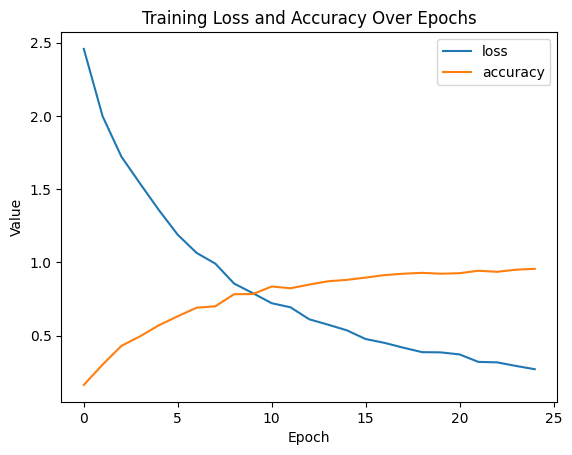

In [27]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['accuracy'],label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training Loss and Accuracy Over Epochs')
plt.legend()

## plotting loss and accuracy of test set

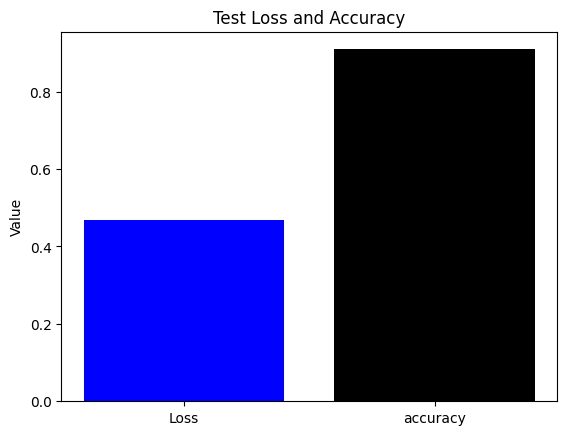

In [28]:
plt.bar(['Loss', 'accuracy'], [loss, acc], color=['blue', 'black'])
plt.ylabel('Value')
plt.title('Test Loss and Accuracy')
plt.show()


## confusion matrix

In [29]:
from sklearn.metrics import confusion_matrix
import itertools

In [30]:
def plot_confusion_matrix(cm,classes,normalize=False,title="confusion Matrix",cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print("Normalized Confusion Matrix")
        
    else:
        print("Confusion matrix without normalization")
    print(cm)
    
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),
                horizontalalignment = 'center',
                color = "white" if cm[i,j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('perdicted label')
    plt.show()
    
  

4/4 [==============================] - 0s 6ms/step
Confusion matrix without normalization
[[ 5  2  0  1  0  2  0  0  0  0]
 [ 0  8  1  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0]
 [ 0  0  1  8  0  1  0  0  0  0]
 [ 0  0  0  0 10  0  0  0  0  0]
 [ 0  0  0  0  0 10  0  0  0  0]
 [ 0  2  0  0  0  0  7  0  1  0]
 [ 0  3  0  0  0  0  0  7  0  0]
 [ 0  1  0  0  0  0  0  0  9  0]
 [ 0  2  0  0  1  0  0  0  0  7]]


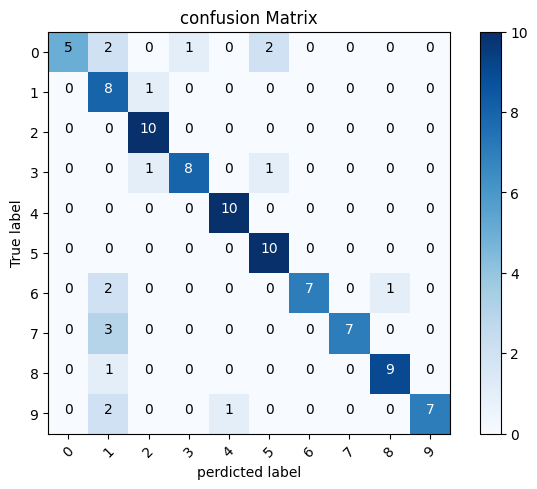

In [32]:
p_test = model.predict(X_test).argmax(axis = 1)
cm = confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))

## prediction function

In [33]:
def process_image(image_path):
    img = Image.open(image_path).convert("L")
    img = img.resize((70,70))
    img_array  = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    img_array = tf.keras.utils.normalize(img_array, axis=1)
    return img_array

In [34]:
def predict_image_category(mod,image_path,categories):
    img_array = process_image(image_path)
    
    predicitions = mod.predict(img_array)
    
    predicted_class_index = tf.argmax(predicitions[0]).numpy()
    
    predicted_class_name = categories[predicted_class_index]
    
    img = Image.open(image_path)
    plt.imshow(img)
    print(predicted_class_index)
    plt.title(f"Predicted Category: {predicted_class_name}")
    plt.show()

1/1 [==============================] - 0s 72ms/step
5


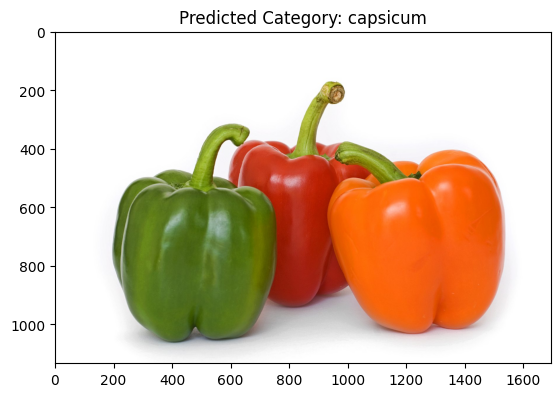

In [36]:
    predict_image_category(model,'./Fruits_Vegetables/sample_test/capsicum/Image_4.jpg',CATEGORIES)

## comparing ann with cnn

In [59]:
cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape=(70,70,1)),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(1000,activation='relu'),
    
    tf.keras.layers.Dense(10,activation='softmax')
    
    
    
])


cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [60]:
l = cnn.fit(X_train,y_train,epochs=23)

Epoch 1/23
27/27 [==============================] - 3s 98ms/step - loss: 2.2986 - accuracy: 0.1280
Epoch 2/23
27/27 [==============================] - 3s 98ms/step - loss: 2.2445 - accuracy: 0.1471
Epoch 3/23
27/27 [==============================] - 3s 103ms/step - loss: 2.1008 - accuracy: 0.1938
Epoch 4/23
27/27 [==============================] - 3s 121ms/step - loss: 1.9393 - accuracy: 0.3002
Epoch 5/23
27/27 [==============================] - 3s 105ms/step - loss: 1.8333 - accuracy: 0.3445
Epoch 6/23
27/27 [==============================] - 3s 100ms/step - loss: 1.7434 - accuracy: 0.3852
Epoch 7/23
27/27 [==============================] - 3s 103ms/step - loss: 1.5803 - accuracy: 0.4593
Epoch 8/23
27/27 [==============================] - 3s 101ms/step - loss: 1.5150 - accuracy: 0.4701
Epoch 9/23
27/27 [==============================] - 3s 104ms/step - loss: 1.3572 - accuracy: 0.5359
Epoch 10/23
27/27 [==============================] - 3s 100ms/step - loss: 1.2113 - accuracy: 0.6065
E

In [65]:
loss2 , acc2 = cnn.evaluate(X_test,y_test)

4/4 [==============================] - 0s 14ms/step - loss: 0.5489 - accuracy: 0.9495


In [66]:
loss2 , acc2

(0.5489053726196289, 0.9494949579238892)

## Plotting loss and accuracy difference between ann and cnn

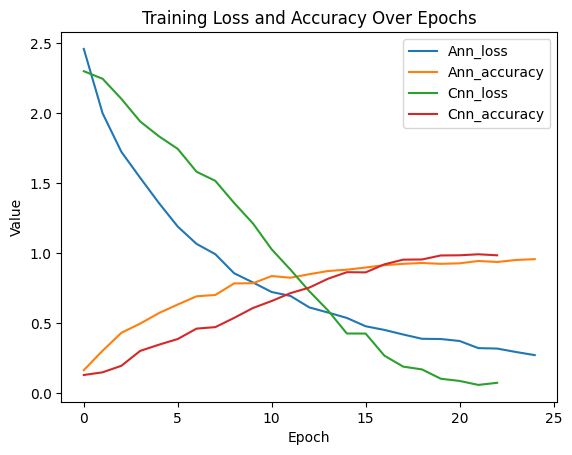

In [67]:
plt.plot(r.history['loss'],label='Ann_loss')
plt.plot(r.history['accuracy'],label='Ann_accuracy')
plt.plot(l.history['loss'],label='Cnn_loss')
plt.plot(l.history['accuracy'],label='Cnn_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training Loss and Accuracy Over Epochs')
plt.legend()

## plotting accuracy difference between ann and cnn


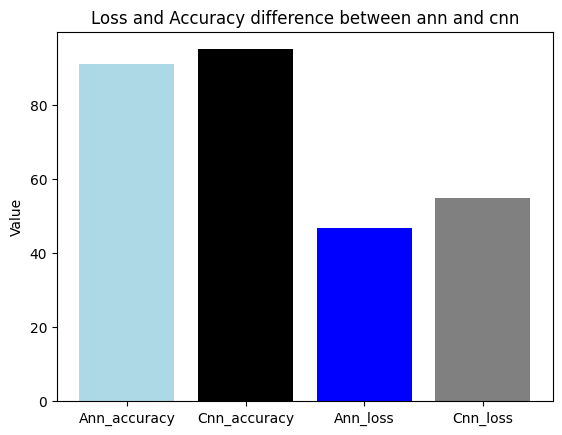

In [68]:
plt.bar(['Ann_accuracy', 'Cnn_accuracy'], [acc * 100, acc2 *100], color=['lightblue', 'black'])
plt.bar(['Ann_loss', 'Cnn_loss'], [loss*100, loss2*100], color=['blue', 'gray'])

plt.ylabel('Value')
plt.title('Loss and Accuracy difference between ann and cnn')
plt.show()
